In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Brief project description:
### creating a dashboar using the data from the first part of the project (coffee project).

# Key Objectives
- Read the data from multiple csv files
- Reshape the data with pandas to set up charts
- build and customize line charts bar charts, histograms and more to communicate key insights to our clients
- modify chart colors to represent national flags
- combine modified charts into a single report be leveraging meshgrids and subplots

In [2]:
#Importing and cleaning the data
coffee_production = pd.read_csv("./total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [4]:
# coffee_production.head()

In [5]:
# not necessary -- > for later
axes_settings = {"spines.top":False,
                "spines.right":False}

plt.rc("axes", **axes_settings)

### Data Prep

In [6]:
brazil_vs_others = coffee_production.assign(
    rest_of_world=coffee_production.drop("Brazil", axis=1).sum(axis=1)).loc[:, ["Brazil", "rest_of_world"]].astype(
    {"Brazil":"float64", "rest_of_world":"float64"}
    )
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [7]:
# coffee_production top5 in 2018
coffee_production["rest of world"] = coffee_production.drop([
    "Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc["2018", ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia","rest of world"]]
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
rest of world    45786.0003
Name: 2018, dtype: object

In [8]:
pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
rest of world,45786.0003


### Meshgrid Layout

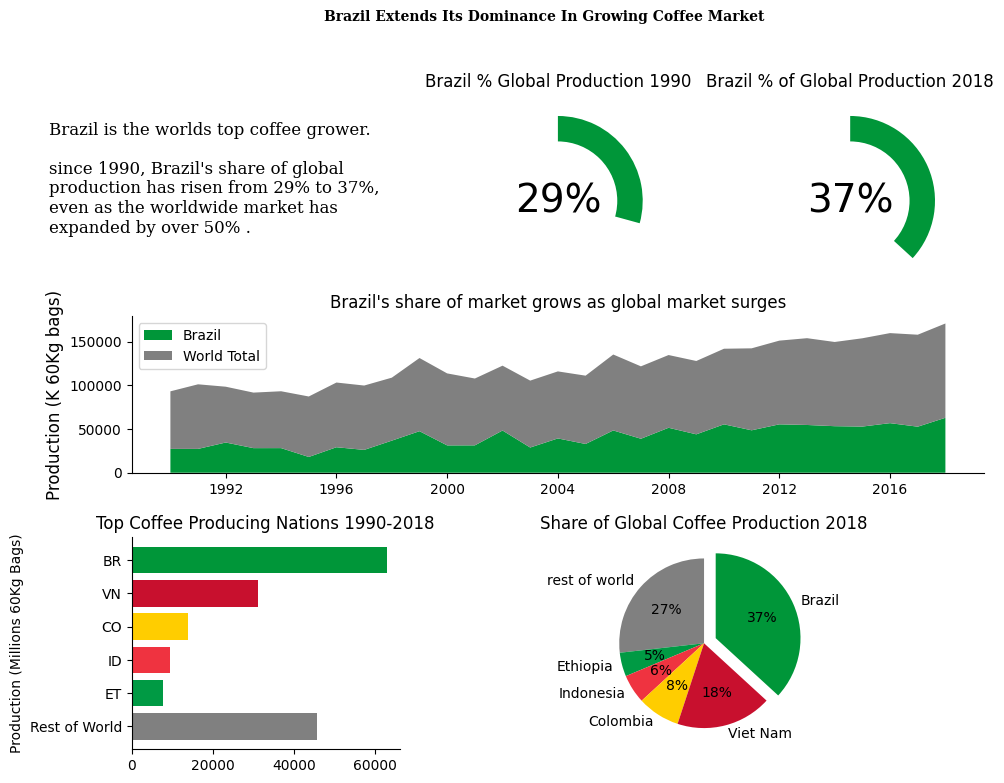

In [22]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(11, 8.5))
gs = gridspec.GridSpec(nrows=12, ncols=6)

#creating main title
fig.suptitle("Brazil Extends Its Dominance In Growing Coffee Market",
            fontsize=10, fontweight="bold", fontfamily="serif")

# text for position upper left
fig.text(0.05, 0.695, #coordinates for the figure
"""Brazil is the worlds top coffee grower.

since 1990, Brazil's share of global
production has risen from 29% to 37%,
even as the worldwide market has
expanded by over 50% .
""", fontsize=12, fontweight="light",fontfamily="serif")

# upper centre
ax1 = fig.add_subplot(gs[0:4, 2:4])

ax1.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
  

ax1.set_title("Brazil % Global Production 1990", fontsize=12)

# upper right
ax2 = fig.add_subplot(gs[0:4, 4:])

ax2.pie(brazil_vs_others.iloc[-1].sort_values(ascending=False),
       startangle=90, labels=["",""], pctdistance=0.85, colors=["white", "#009639"])

center_circle=plt.Circle((0,0), 0.7, fc="white")
fig=plt.gcf()

# adding circle to pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc["2018", "Brazil"] / brazil_vs_others.loc["2018"].sum()*100))}%",
    ha="center",
    va="center", fontsize=28
)

ax2.set_title("Brazil % of Global Production 2018", fontsize=12)


# stack plot in the middle
ax3 = fig.add_subplot(gs[4:7, :])

ax3.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"),
    brazil_vs_others["Brazil"], brazil_vs_others["rest_of_world"], labels=["Brazil", "World Total"], colors=["#009639", "grey"]
)

ax3.set_title("Brazil's share of market grows as global market surges")
ax3.set_ylabel("Production (K 60Kg bags)", fontsize=12)

ax3.legend(loc="upper left")

# lower left side
ax4=fig.add_subplot(gs[8:, 0:2])

ax4.barh(y=coffee_production_top5_2018.index[::-1], width = coffee_production_top5_2018.iloc[::-1],
       color=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"])

positions=list(range(6))
labels=["BR", "VN", "CO", "ID","ET","Rest of World"][::-1]

ax4.set_title("Top Coffee Producing Nations 1990-2018")
ax4.set_ylabel("Production (Millions 60Kg Bags)")
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)

ax5=fig.add_subplot(gs[8:, 2:])

# lower right side
ax5.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90,
       colors = ["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639", "#C8102E", ],
       explode=(0, 0, 0, 0, 0, .15))

ax5.set_title("Share of Global Coffee Production 2018")

#saving as png and jpg format
# fig.savefig("brazil stats.jpg", bbox_inches="tight", facecolor="white")
# fig.savefig("brazil stats.png", bbox_inches="tight", facecolor="white")

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [24]:
prices_paid_to_growers = pd.read_csv("./prices-paid-to-growers.csv").T.drop(9, axis=1)
prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]
prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)
prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


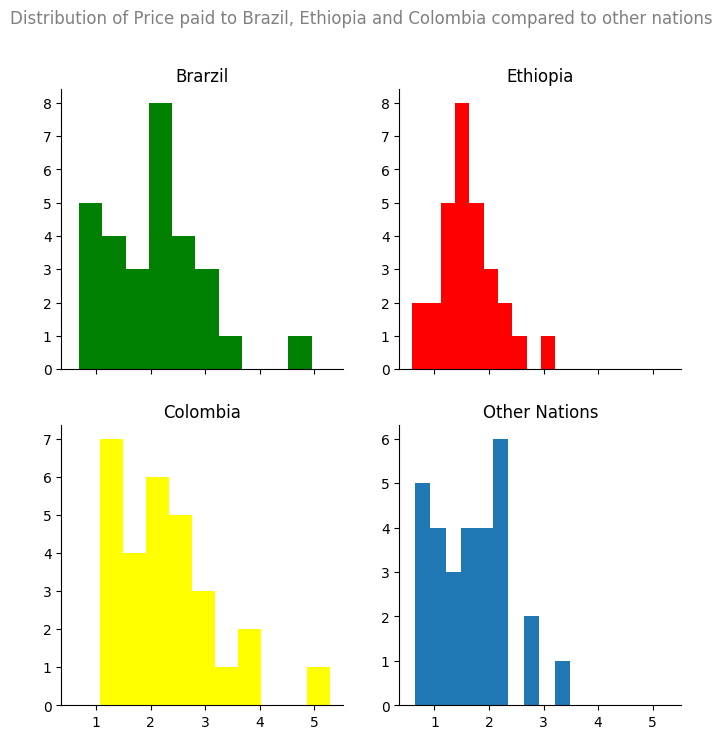

In [36]:
fig, ax=plt.subplots(2,2, figsize=(8,8), sharex="all")

fig.suptitle("Distribution of Price paid to Brazil, Ethiopia and Colombia compared to other nations", color="grey")

ax[0][0].set_title("Brarzil")
ax[0][0].hist(prices_paid_to_growers["Brazil"], color="green")

ax[1][0].set_title("Colombia")
ax[1][0].hist(prices_paid_to_growers["Colombia"], color="yellow")

ax[0][1].set_title("Ethiopia")
ax[0][1].hist(prices_paid_to_growers["Ethiopia"], color="red")

ax[1][1].set_title("Other Nations")
ax[1][1].hist(prices_paid_to_growers["Other Nations"]);